In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [54]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [55]:
data = pd.read_json('logins.json')

data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [57]:
data['date'] = data['login_time'].dt.date

In [58]:
data['time'] = data['login_time'].dt.time

In [59]:
data.head()

,login_time,date,time
0,1970-01-01 20:13:18,1970-01-01,20:13:18
1,1970-01-01 20:16:10,1970-01-01,20:16:10
2,1970-01-01 20:16:37,1970-01-01,20:16:37
3,1970-01-01 20:16:36,1970-01-01,20:16:36
4,1970-01-01 20:26:21,1970-01-01,20:26:21


(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text major ticklabel objects>)

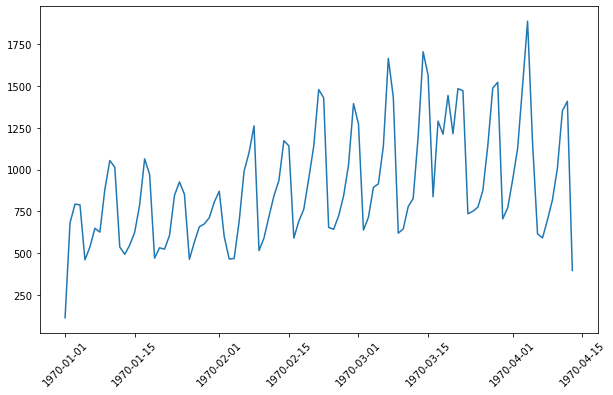

In [60]:
plt.figure(figsize=(10,6))
plt.plot(data.groupby('date')['login_time'].count())
plt.xticks(rotation=45)

In [63]:
data['date'] = pd.to_datetime(data['date'])

We see from this initial graph of the daily counts that there seems to be a consistent rise and fall in logins that has about 2/3 peaks per week and 2/3 valleys in logins, with an exception around 03-15-1970.

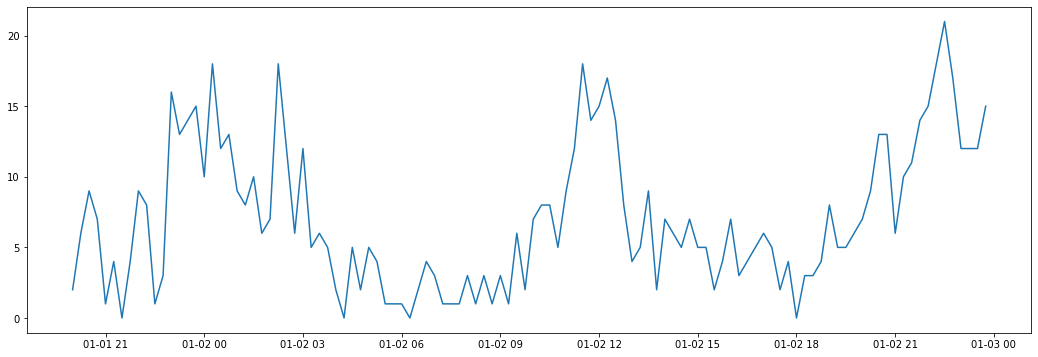

In [64]:
plt.figure(figsize=(18,6))
plt.plot(data[data['date'] < '1970-01-03'].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

In this graphic, we see the breakdown by 15 minute intervals for logins for the first 2 days of logins recorded. There seems to be fewer logins in the early morning, then a spike around 12, followed by a drop until around 7 PM, when the logins pick up again through around 2AM, before the pattern repeats. Let's look at a different 2 day period and see if this trend continues.

Text(0.5, 0, 'Time (15 minute intervals)')

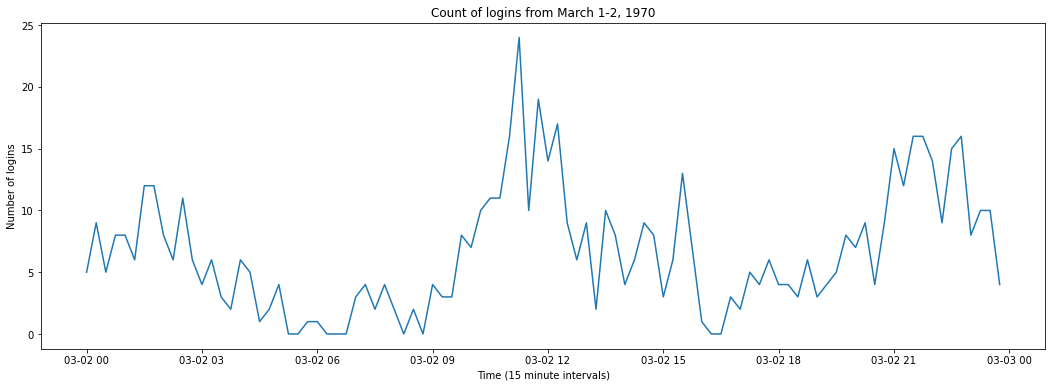

In [65]:
plt.figure(figsize=(18,6))
plt.plot(data[(data['date'] < '1970-03-03') & (data['date'] > '1970-03-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

plt.title("Count of logins from March 1-2, 1970")
plt.ylabel('Number of logins')
plt.xlabel('Time (15 minute intervals)')

We see a similar pattern as before, with the number of logins rising around 12AM, 12PM, and after 7PM, while dropping after 3AM and 4 PM. The conclusion is that most logins happen around lunch and late in the evening of most days.

Text(0.5, 0, 'Time (15 minute intervals)')

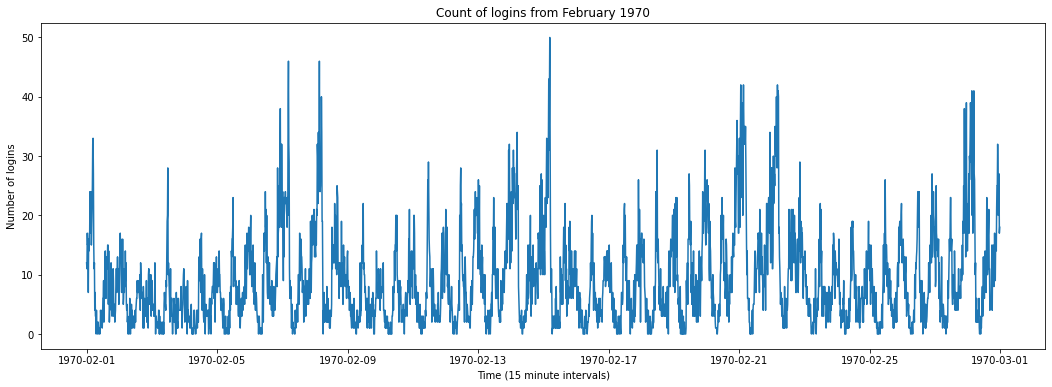

In [66]:
plt.figure(figsize=(18,6))
plt.plot(data[(data['date'] < '1970-03-01') & (data['date'] >= '1970-02-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

plt.title("Count of logins from February 1970")
plt.ylabel('Number of logins')
plt.xlabel('Time (15 minute intervals)')

We see, in this graphic, that the general average count for logins per 15 minutes is around 10 with many peaks and valleys that occur throughout the month shown. We will now look at the trends for a week and see if there is any patterns to discern there.

Text(0.5, 0, 'Time (15 minute intervals)')

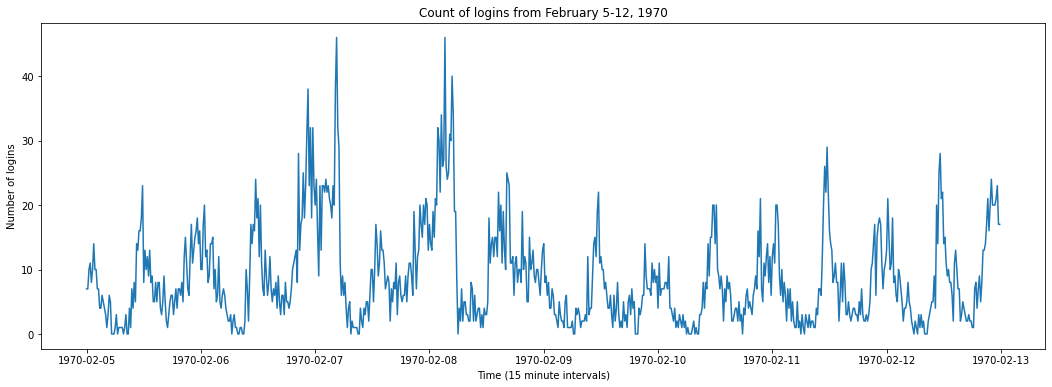

In [67]:
plt.figure(figsize=(18,6))
plt.plot(data[(data['date'] < '1970-02-13') & (data['date'] > '1970-02-04')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

plt.title("Count of logins from February 5-12, 1970")
plt.ylabel('Number of logins')
plt.xlabel('Time (15 minute intervals)')

Text(0.5, 0, 'Time (15 minute intervals)')

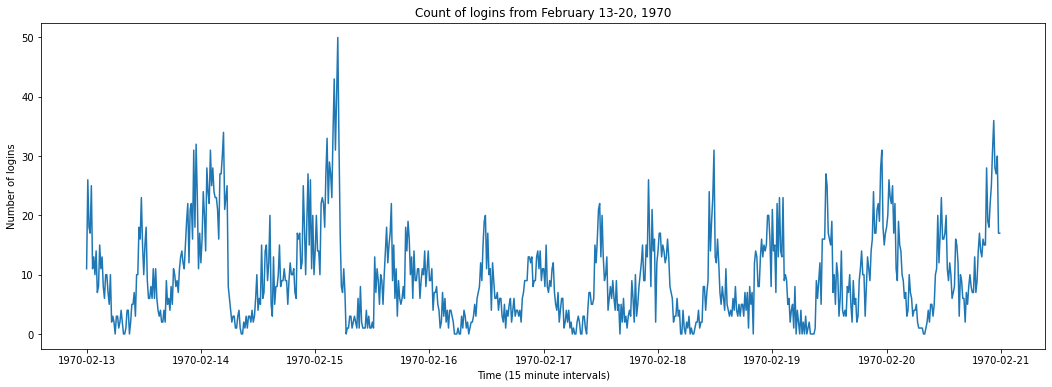

In [68]:
plt.figure(figsize=(18,6))
plt.plot(data[(data['date'] > '1970-02-12') & (data['date'] < '1970-02-21')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

plt.title("Count of logins from February 13-20, 1970")
plt.ylabel('Number of logins')
plt.xlabel('Time (15 minute intervals)')

After analyzing these two weeks, we see that February 8th and February 15 have the largest peaks for logins. It is noteable that the day of the week for these two days is Sunday, so it would be fair to say that the login volume increases on Sundays.

The lowest volumne tends to be on Tuesdays (February 10th and February 17th shown above).

### Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#### Answers

1. The key measure for success would have to be overall percentage increase in traffic over the bridge. I would choose this metric as it shows the direct level of traffic between the cities.
2.  a. An experiment that would be possible would be to reduce the toll in the direction that takes drivers away from the city with higher activity. For example, half price toll for drivers traveling from Gotham to Metropolis at night. 
    b. Our statistical tests will be simply measure the overall change in toll traffic before and after the experiment is implemented. If there is a statistically significant increase in traffic over the bridge (given by a percentage increase such as 50%)
    c. We would interpret the results on two folds. One way would be the rate of increase in traffic, if any, overall. The other metric will be the tolls paid after the discount, and whether it is an overall increase in revenue with the discount.

### Part 3

In [69]:
file = pd.read_json('ultimate_data_challenge.json')

file.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [70]:
file.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [72]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [73]:
file.dropna(inplace=True)

file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [74]:
file.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [75]:
file['ultimate_black_user'].unique()

array([ True, False])

In [82]:
file['ultimate_black_user'] = file['ultimate_black_user'].astype(int)

file['ultimate_black_user'].unique()

array([1, 0])

In [83]:
file['signup_date'] = pd.to_datetime(file['signup_date'])
file['last_trip_date'] = pd.to_datetime(file['last_trip_date'])

In [84]:
file['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [85]:
file['phone'].replace({'iPhone':1,'Android':0},inplace=True)

file['phone'].unique()

array([1, 0], dtype=int64)

In [86]:
file.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9


In [87]:
file.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,0.708216,8.898709,0.384099,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,0.454589,18.322061,0.486387,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,0.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,1.000000,0.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,1.000000,11.100000,1.000000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,1.000000,100.000000,1.000000,100.000000,79.690000,5.000000


(array([735234., 735238., 735242., 735246., 735250., 735254., 735258.,
        735262., 735265.]),
 <a list of 9 Text major ticklabel objects>)

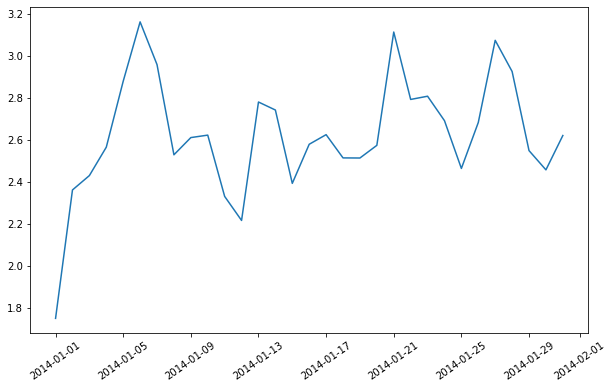

In [92]:
plt.figure(figsize=(10,6))

plt.plot(file.groupby('signup_date')['trips_in_first_30_days'].mean())

plt.xticks(rotation=35)

(array([735234., 735265., 735293., 735324., 735354., 735385., 735415.]),
 <a list of 7 Text major ticklabel objects>)

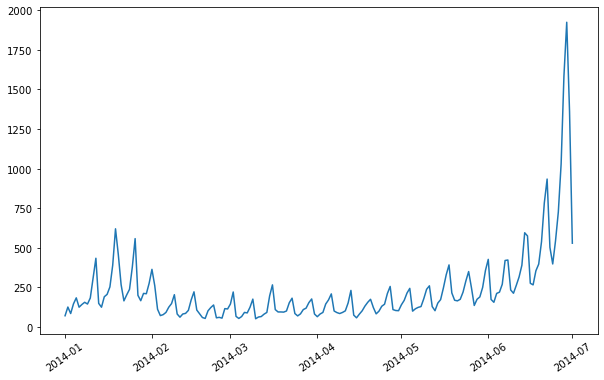

In [108]:
plt.figure(figsize=(10,6))

plt.plot(file.groupby('last_trip_date')['phone'].count())

plt.xticks(rotation=35)

In [121]:
retention_perc = file[file['last_trip_date'].dt.month >= 6].shape[0]/file.shape[0]

print("The percentage of customers that were retained is " + str(round(retention_perc,2) * 100) + "%")

The percentage of customers that were retained is 41.0%
